In [11]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio import plot
from matplotlib.colors import LinearSegmentedColormap

def plot_map(data, transform, title=None):
    """
    Plots single band of Sentinel-2 image, adds the wildfire position as a point, and optionally sets a title.
    
    Parameters:
    - data: The dataset to be plotted.
    - transform: Affine transform for the dataset.
    - title: Optional. The title for the plot. If None, no title will be set.
    """
    # Define the custom colormap
    colors = [
        (0.0, "blue"),   # NDVI < 0, water
        (0.25, "grey"),  # NDVI close to 0, bare soil - lower bound
        (0.5, "yellow"), # NDVI close to 0, bare soil - upper bound
        (0.75, "beige"), # Transition between bare soil and vegetation
        (1.0, "green"),  # NDVI close to 1, vegetation
    ]
    custom_cmap = LinearSegmentedColormap.from_list("ndvi", colors)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    nbr_map = plot.show(data, transform=transform, interpolation="none", cmap=custom_cmap, ax=ax, vmin=-1.0, vmax=1.0)
    
    # Set the coordinates of the forest site in Falkenberg, Brandenburg in UTM33N
    easting, northing = 728443.94, 1601283.24
    
    # Set a distance to reduce the map extent to the surrounding 10 kilometres
    distance = 10000
    
    # Set the the x and y scales (Extent of the map)
    ax.set_xlim(easting - distance, easting + distance)
    ax.set_ylim(northing - distance, northing + distance)
    
    # Plot the position of the forest as red dot
    ax.scatter(easting, northing, s=10, c="r")
    
    # If a title is provided, set it on the plot
    if title:
        plt.title(title)
    
    plt.colorbar(nbr_map.get_images()[0], extend='both')
    plt.show()



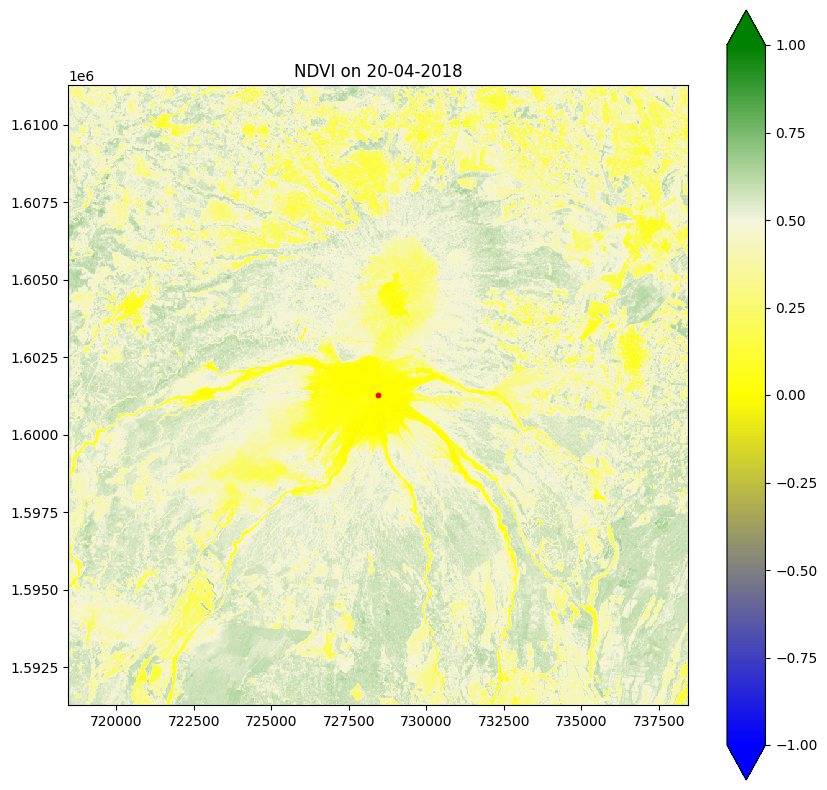

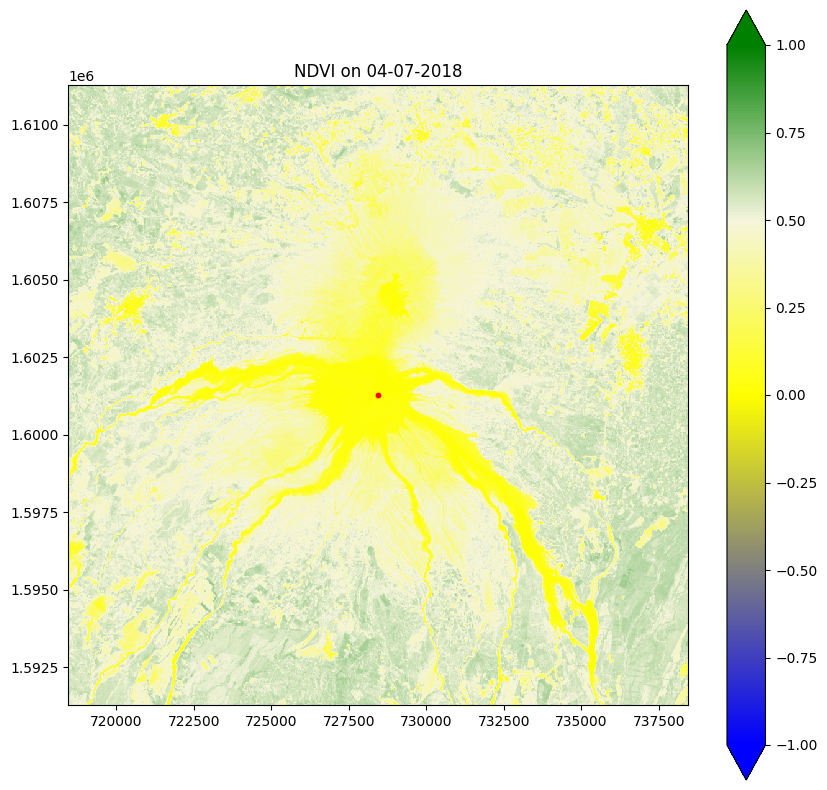

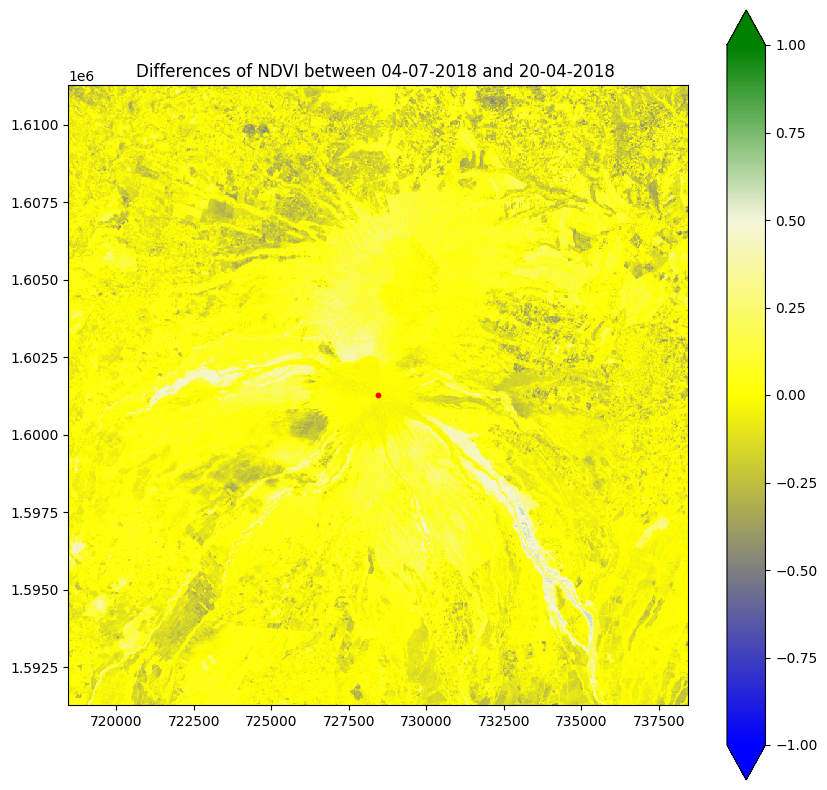

In [15]:
raster_pre = rasterio.open("L2A_T15PYS_A014766_20180420T163415.tiff")
raster_post = rasterio.open("L2A_T15PYS_A006930_20180704T163215.tiff")


ndvi_pre = nbr(raster_pre.read(4), raster_pre.read(3))
ndvi_post = nbr(raster_post.read(4), raster_post.read(3))


dndvi = ndvi_pre - ndvi_post


transform = raster_pre.transform
plot_map(ndvi_pre, transform,'NDVI on 20-04-2018')
transform1 = raster_post.transform
plot_map(ndvi_post, transform1,'NDVI on 04-07-2018')

# Plot the dNBR as a map
plot_map(dndvi, transform1, 'Differences of NDVI between 04-07-2018 and 20-04-2018 ' )